In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

In [3]:
from ln_utils import *

In [4]:
%matplotlib inline

# Parameters

In [5]:
is_directed = True
time_window = 86400*7

# Load temporal data

In [6]:
graph_files = []

In [7]:
data_dir = "../LNdata/lncaptures/lngraph/2019/"
graph_files +=  [data_dir + f for f in sorted(os.listdir(data_dir)) if ".json" in f]
MIN_TIME = 1549065601-86400 #Saturday, February 2, 2019 12:00:01 AM
#MAX_TIME = 1552867201 #Monday, March 18, 2019 12:00:01 AM

In [8]:
data_dir = "../LNdata/"
#graph_files = [data_dir + f for f in sorted(os.listdir(data_dir)) if ".json" in f]
graph_files += [data_dir + f for f in sorted(os.listdir(data_dir)) if ".json" in f][5:]
#MIN_TIME = 1552478399 # Wednesday, March 13, 2019 11:59:59 AM
MAX_TIME = 1553947199 # Saturday, March 30, 2019 11:59:59 AM

In [9]:
graph_files = graph_files

In [10]:
graph_files

['../LNdata/lncaptures/lngraph/2019/1549032366.json',
 '../LNdata/lncaptures/lngraph/2019/1549065601.json',
 '../LNdata/lncaptures/lngraph/2019/1549152001.json',
 '../LNdata/lncaptures/lngraph/2019/1549238401.json',
 '../LNdata/lncaptures/lngraph/2019/1549324801.json',
 '../LNdata/lncaptures/lngraph/2019/1549411201.json',
 '../LNdata/lncaptures/lngraph/2019/1549497602.json',
 '../LNdata/lncaptures/lngraph/2019/1549584001.json',
 '../LNdata/lncaptures/lngraph/2019/1549670401.json',
 '../LNdata/lncaptures/lngraph/2019/1549756801.json',
 '../LNdata/lncaptures/lngraph/2019/1549843201.json',
 '../LNdata/lncaptures/lngraph/2019/1549929601.json',
 '../LNdata/lncaptures/lngraph/2019/1550016001.json',
 '../LNdata/lncaptures/lngraph/2019/1550102401.json',
 '../LNdata/lncaptures/lngraph/2019/1550188801.json',
 '../LNdata/lncaptures/lngraph/2019/1550275201.json',
 '../LNdata/lncaptures/lngraph/2019/1550361601.json',
 '../LNdata/lncaptures/lngraph/2019/1550448001.json',
 '../LNdata/lncaptures/lngra

In [11]:
nodes, edges = load_temp_data(graph_files[:-1])
print(len(nodes), len(edges))

../LNdata/lncaptures/lngraph/2019/1549032366.json 2826 22460
../LNdata/lncaptures/lngraph/2019/1549065601.json 295 9797
../LNdata/lncaptures/lngraph/2019/1549152001.json 438 16685
../LNdata/lncaptures/lngraph/2019/1549238401.json 418 17162
../LNdata/lncaptures/lngraph/2019/1549324801.json 393 17367
../LNdata/lncaptures/lngraph/2019/1549411201.json 456 18152
../LNdata/lncaptures/lngraph/2019/1549497602.json 494 18534
../LNdata/lncaptures/lngraph/2019/1549584001.json 548 18566
../LNdata/lncaptures/lngraph/2019/1549670401.json 737 19542
../LNdata/lncaptures/lngraph/2019/1549756801.json 535 19139
../LNdata/lncaptures/lngraph/2019/1549843201.json 516 18935
../LNdata/lncaptures/lngraph/2019/1549929601.json 564 19501
../LNdata/lncaptures/lngraph/2019/1550016001.json 510 19318
../LNdata/lncaptures/lngraph/2019/1550102401.json 677 20572
../LNdata/lncaptures/lngraph/2019/1550188801.json 616 20725
../LNdata/lncaptures/lngraph/2019/1550275201.json 520 21087
../LNdata/lncaptures/lngraph/2019/155036

In [12]:
nodes = nodes[(nodes["last_update"] > MIN_TIME) & (nodes["last_update"] < MAX_TIME)]
edges = edges[(edges["last_update"] > MIN_TIME) & (edges["last_update"] < MAX_TIME)]
len(nodes), len(edges)

(34007, 1349592)

In [13]:
edges = edges.sort_values("last_update")

#### Capacity on edges can change

In [14]:
edges.groupby(["node1_pub","node2_pub"])["capacity"].nunique().value_counts()

1     46118
2      3573
3       419
4        75
5        30
6        11
12        1
10        1
9         1
8         1
7         1
Name: capacity, dtype: int64

# Analyzing graph snapshots

### Snapshots with the number of edges

In [15]:
snaphots = get_snapshots(edges, MIN_TIME, MAX_TIME, with_time=False, time_window=time_window)

0 126332
1 137733
2 152275
3 161260
4 169742
5 191663
6 198082
7 202960


### Calculate centralities for snapshots

In [16]:
stats = get_snapshot_properties(snaphots, is_directed=is_directed)

20882 2719
Centralities COMPUTED
26411 3038
Centralities COMPUTED
28406 3176
Centralities COMPUTED
29614 3403
Centralities COMPUTED
31028 3549
Centralities COMPUTED
34049 3667
Centralities COMPUTED
37429 3775
Centralities COMPUTED
37237 3823
Centralities COMPUTED


In [17]:
for idx, snap_stat in enumerate(stats):
    snap_stat.to_csv("stat_%i.csv" % idx, index=False)

# Correlation time series

In [18]:
results = dict([(corr, get_corr_sequence(stats, corr)) for corr in ["pearson","spearman","kendall","w_kendall"]])

### Correlation of centrality measures on adjacent days

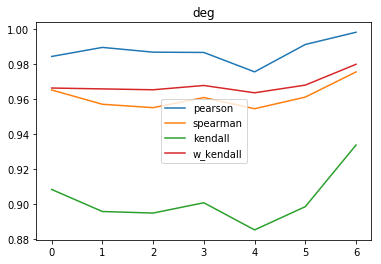

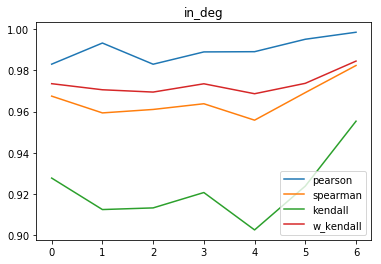

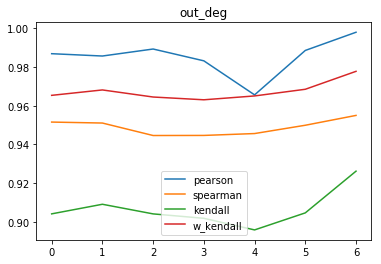

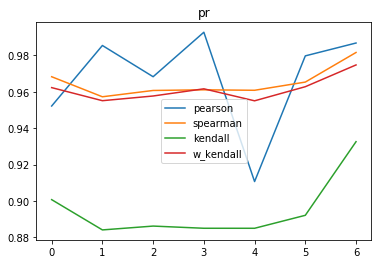

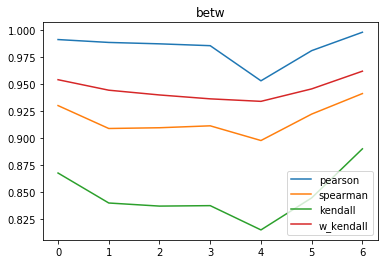

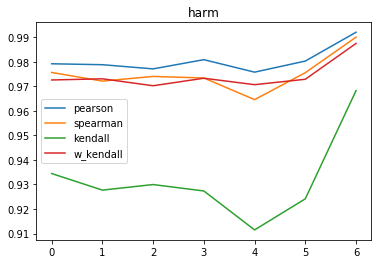

In [19]:
for cent in  ["deg","in_deg","out_deg","pr","betw","harm"]:
    show_corr_results(results, cent)